### Import needed libraries.

In [2198]:
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
import re, string, collections
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [2199]:
pd.set_option('display.max_columns', 1_000)
pd.set_option('display.max_rows', 1_000)

### Read the data.
*We have 1,972 observations and 9 features.*  
*Classes are well balanced - 50.70% to 49.30%*

In [2200]:
df = pd.read_csv('../data/subreddits.csv')

In [2201]:
df.shape

(1972, 9)

In [2202]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question


In [2203]:
df['class_target'].value_counts(normalize=True)

0    0.507099
1    0.492901
Name: class_target, dtype: float64

In [2204]:
df.isnull().sum()

title                    0
selftext                 0
class_target             0
text                     0
title_char_count         0
title_word_count         0
selftext_char_count      0
selftext_word_count      0
flair                  631
dtype: int64

### Distribution of the title_char_count variable by class.
*Right skewed, with most post titles ranging between 25-50 characters.*

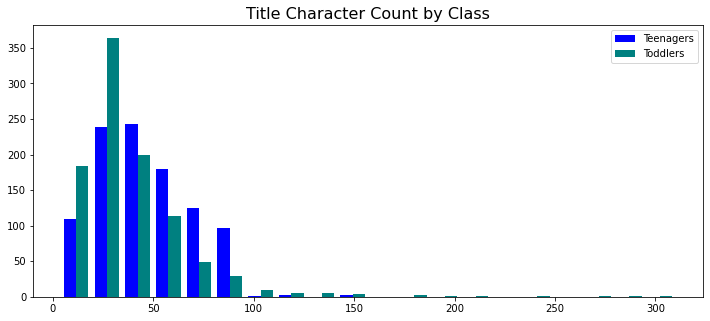

In [2205]:
plt.figure(figsize=(12,5))
plt.hist([df[df['class_target']==0]['title_char_count'], 
          df[df['class_target']==1]['title_char_count']],
         bins=20, color=['blue', 'teal'])
plt.title('Title Character Count by Class', fontsize=16)
plt.legend(['Teenagers', 'Toddlers']);
plt.savefig('../images/fig1.jpg', dpi=400)

### Distribution of the title_word_count variable by class.
*Right skewed, with most post titles ranging between 5-9 words.*

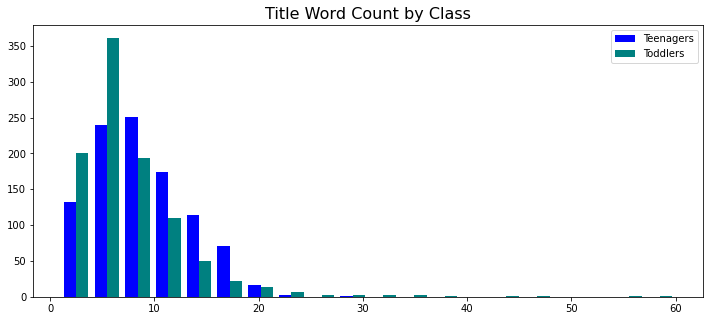

In [2206]:
plt.figure(figsize=(12,5))
plt.hist([df[df['class_target']==0]['title_word_count'], 
          df[df['class_target']==1]['title_word_count']],
         bins=20, color=['blue', 'teal'])
plt.title('Title Word Count by Class', fontsize=16)
plt.legend(['Teenagers', 'Toddlers']);
plt.savefig('../images/fig2.jpg', dpi=400)

### Distribution of the selftext_char_count variable by class.
*Right skewed.*

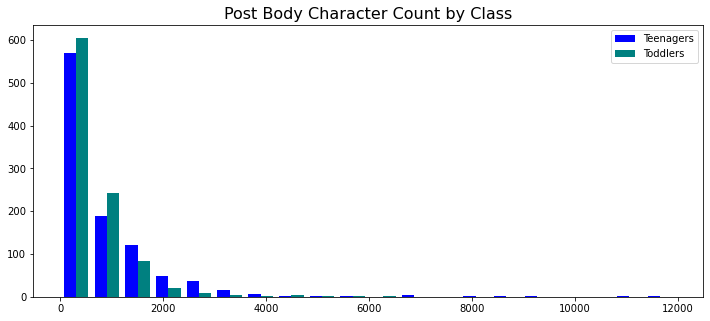

In [2207]:
plt.figure(figsize=(12,5))
plt.hist([df[df['class_target']==0]['selftext_char_count'], 
          df[df['class_target']==1]['selftext_char_count']],
         bins=20, color=['blue', 'teal'])
plt.title('Post Body Character Count by Class', fontsize=16)
plt.legend(['Teenagers', 'Toddlers']);
plt.savefig('../images/fig3.jpg', dpi=400)

### Distribution of the selftext_word_count variable by class.
*Right skewed.*

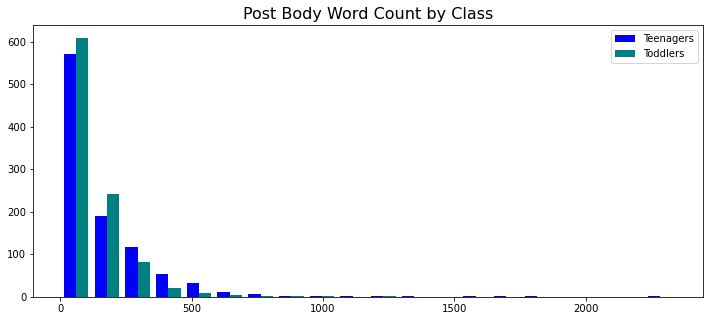

In [2208]:
plt.figure(figsize=(12,5))
plt.hist([df[df['class_target']==0]['selftext_word_count'], 
          df[df['class_target']==1]['selftext_word_count']],
         bins=20, color=['blue', 'teal'])
plt.title('Post Body Word Count by Class', fontsize=16)
plt.legend(['Teenagers', 'Toddlers']);
plt.savefig('../images/fig4.jpg', dpi=400)

### Distribution of the title_char_count and title_word_count variables.
*Distributions are right skewed.*

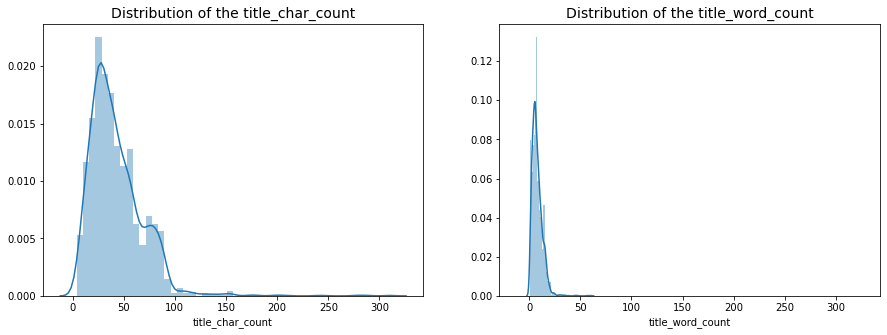

In [2209]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=False, figsize=(15,5))
a = sns.distplot(df['title_char_count'], ax=ax1)
a = sns.distplot(df['title_word_count'], ax=ax2)
ax1.set_title('Distribution of the title_char_count', fontsize=14)
ax2.set_title('Distribution of the title_word_count', fontsize=14)
fig.savefig('../images/fig5.jpg', dpi=400)

### Distribution of the selftext_char_count and selftext_word_count variables.
*Distributions are right skewed.*

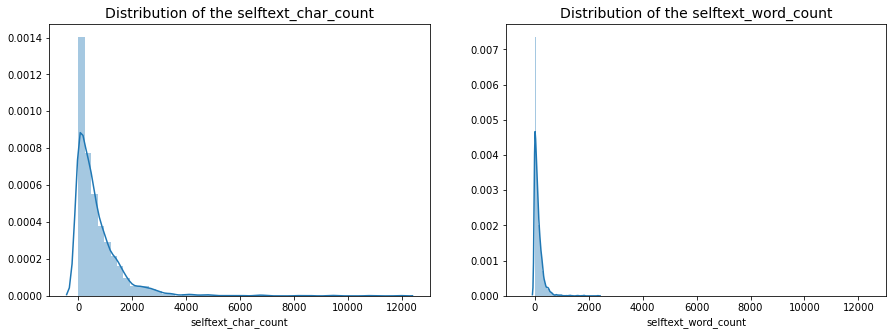

In [2210]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=False, figsize=(15,5))
ax1.set_title('Distribution of the selftext_char_count', fontsize=14)
ax2.set_title('Distribution of the selftext_word_count', fontsize=14)
a = sns.distplot(df['selftext_char_count'], ax=ax1)
a = sns.distplot(df['selftext_word_count'], ax=ax2)
fig.savefig('../images/fig6.jpg', dpi=400)

### Classes are well balanced.

In [2211]:
df['class_target'].value_counts(normalize=True)

0    0.507099
1    0.492901
Name: class_target, dtype: float64

### Create a custom list of stop words - these words will not be included in the analysis.

In [2212]:
my_stop_words = []

In [2213]:
my_stop_words = my_stop_words + \
                ['toddler', 'teenager', 
                 '[removed]', 'toddlers', 
                 'teenagers', '[removed]',
                 'removed'
                ] + \
                stopwords.words('english')  

In [2214]:
len(my_stop_words)

186

### Vectorize the 'text' variable.

In [2215]:
cvec = CountVectorizer(stop_words=my_stop_words
                       , min_df=1
                       , max_df=.50
                       , analyzer='word'
                       , ngram_range=(1,2)
                       , max_features=10_000
                      )

In [2216]:
cvec.fit(df['text']);

In [2217]:
term_mat = cvec.transform(df['text'])

In [2218]:
term_mat.shape

(1972, 10000)

In [2219]:
term_df = pd.DataFrame(term_mat.todense(), columns=cvec.get_feature_names())

In [2220]:
term_df.head()

,00,000,00am,10,100,1000,10am,10k,10min,10pm,10th,11,11am,11pm,12,12am,13,13 son,13 year,13 yo,13f,13m,13yo,14,14 year,14f,14m,14mo,14th,14th birthday,14yo,14yo daughter,14yo sister,14yr,14yr old,15,15 year,15f,15f grades,15m,15mo,15yo,16,16 year,16f,16m,16yo,17,17 year,17f,17m,17yo,17yo daughter,18,18 month,18 year,18m,18month,18th,18yo,19,19m,19m old,19mo,1am,1k,1pm,1st,1yr,20,2018,2020,20f,20m,20m old,20mo,21,22,23,24,25,2am,2hrs,2nd,2t,2yo,2yr,2yr old,30,30a,30am,30pm,33f,3am,3pm,3rd,3rd birthday,3t,3yo,3yo daughter,45,47m,4am,4pm,4th,4years,4yo,50,50 custody,5am,5pm,5th,5yo,6am,70,75,7am,7pm,7th,7th grade,80,8pm,8th,8th grade,8yo,90,90 time,90s,95,99,9m,9pm,9th,9th grade,abandoned,abc,abilities,ability,ability make,able,able afford,able everything,able find,able get,able give,able help,able hold,able offer,able right,able see,able sit,able talk,able tell,abnormal,abortion,abroad,absolute,absolutely,absolutely devastated,absolutely miserable,absorb,absorbent,abuse,abused,abuses,abusive,ac,academic,accent,accept,accept help,accept trying,acceptable,accepted,accepting,accepts,access,access phone,accident,accidentally,accidents,accomplish,accomplished,accomplishments,according,account,accountable,accounts,accused,achieve,achieving,acknowledge,acne,acquired,across,act,act like,act way,acted,acting,acting like,acting weird,action,actions,active,actively,activities,activity,acts,acts like,actual,actual fuck,actually,actually communicate,actually eat,actually get,actually going,actually know,ada,adamant,adamantly,add,add details,added,addict,addicted,addiction,adding,addition,additional,additionally,address,addressed,adhd,adjust,adjusted,adjusting,admissions,admit,admitted,adolescent,adopt,adopted,adorable,adult,adult would,adulthood,adults,advance,advanced,advantage,adventure,advice,advice anyone,advice appreciated,advice background,advice daughter,advice experience,advice guys,advice handle,advice help,advice hi,advice mostly,advice needed,advice please,advice son,advice teenage,advice welcome,advice words,advice would,advice year,advise,advised,advocate,af,affect,affected,affecting,affection,affectionate,affects,afford,afraid,afraid ask,afraid dark,afraid laughter,afraid something,afternoon,afternoons,afterward,age,age 13,age 14,age appropriate,age consent,age feel,age gap,age good,age kids,age know,age would,age year,aged,ages,aggressive,ago,ago came,ago going,ago good,ago got,ago noticed,ago one,ago since,ago son,ago started,ago told,ago wife,ago year,ago younger,agree,agreed,agreement,ahead,aid,air,airbag,airlines,alarm,alcohol,alcoholic,aldi,alexander,algebra,alice,alienate,alive,allergic,allergies,allow,allow daughter,allow year,allowance,allowed,allowed get,allowed go,allowed stay,allowing,allowing see,allows,almost,almost 3yo,almost always,almost cried,almost every,almost grow,almost like,almost month,almost months,almost never,almost three,almost two,almost year,almost years,alone,alone always,alone anymore,alone remember,alone room,along,along lines,along way,along well,alot,alphabet,already,already talking,already trying,alright,also,also already,also feel,also general,also got,also help,also know,also month,also never,also really,also said,also sister,also something,also started,also teach,also time,also told,also want,also working,also worry,also year,alternate,alternative,although,altogether,always,always close,always done,always feel,always get,always give,always good,always great,always hated,always know,always loving,always made,always makes,always pretty,always read,always said,always says,always self,always stay,always taught,always tell,always thought,always told,always tried,always trouble,always try,always wanting,always wants,ama,amazed,amazing,amazingly,amazon,amazon com,america,american,amicable,among,amongst,amount,amount time,amp,amp dad,amp ms,amp nbsp,amp utm,amp x200b,andrea,android,angel,anger,angrier,angrily,angry,angry frustrated,angry mother,animal,animals,anime,announced,annoyed,annoying,annoy

### Top 20 Most Used Words Across All Posts.

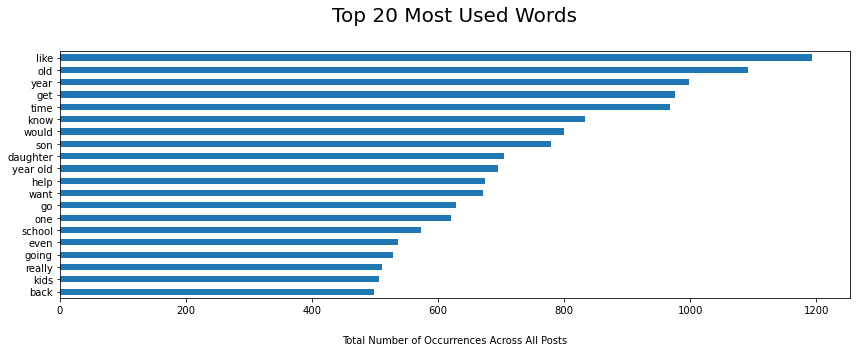

In [2221]:
plt.figure(figsize=(12,5))
fontdict = {'fontsize': 20, 'color' : 'black'}
plt.title('Top 20 Most Used Words', fontdict=fontdict, pad=30)
plt.xlabel('Total Number of Occurrences Across All Posts', fontsize=10, labelpad=20)
term_df.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh');
plt.tight_layout()
plt.savefig('../images/fig7.jpg', dpi=400)

### Insert the target into the vectorized dataframe.

In [2222]:
term_df.insert(0, 'class_target', df['class_target'])

In [2223]:
term_df.head()

,class_target,00,000,00am,10,100,1000,10am,10k,10min,10pm,10th,11,11am,11pm,12,12am,13,13 son,13 year,13 yo,13f,13m,13yo,14,14 year,14f,14m,14mo,14th,14th birthday,14yo,14yo daughter,14yo sister,14yr,14yr old,15,15 year,15f,15f grades,15m,15mo,15yo,16,16 year,16f,16m,16yo,17,17 year,17f,17m,17yo,17yo daughter,18,18 month,18 year,18m,18month,18th,18yo,19,19m,19m old,19mo,1am,1k,1pm,1st,1yr,20,2018,2020,20f,20m,20m old,20mo,21,22,23,24,25,2am,2hrs,2nd,2t,2yo,2yr,2yr old,30,30a,30am,30pm,33f,3am,3pm,3rd,3rd birthday,3t,3yo,3yo daughter,45,47m,4am,4pm,4th,4years,4yo,50,50 custody,5am,5pm,5th,5yo,6am,70,75,7am,7pm,7th,7th grade,80,8pm,8th,8th grade,8yo,90,90 time,90s,95,99,9m,9pm,9th,9th grade,abandoned,abc,abilities,ability,ability make,able,able afford,able everything,able find,able get,able give,able help,able hold,able offer,able right,able see,able sit,able talk,able tell,abnormal,abortion,abroad,absolute,absolutely,absolutely devastated,absolutely miserable,absorb,absorbent,abuse,abused,abuses,abusive,ac,academic,accent,accept,accept help,accept trying,acceptable,accepted,accepting,accepts,access,access phone,accident,accidentally,accidents,accomplish,accomplished,accomplishments,according,account,accountable,accounts,accused,achieve,achieving,acknowledge,acne,acquired,across,act,act like,act way,acted,acting,acting like,acting weird,action,actions,active,actively,activities,activity,acts,acts like,actual,actual fuck,actually,actually communicate,actually eat,actually get,actually going,actually know,ada,adamant,adamantly,add,add details,added,addict,addicted,addiction,adding,addition,additional,additionally,address,addressed,adhd,adjust,adjusted,adjusting,admissions,admit,admitted,adolescent,adopt,adopted,adorable,adult,adult would,adulthood,adults,advance,advanced,advantage,adventure,advice,advice anyone,advice appreciated,advice background,advice daughter,advice experience,advice guys,advice handle,advice help,advice hi,advice mostly,advice needed,advice please,advice son,advice teenage,advice welcome,advice words,advice would,advice year,advise,advised,advocate,af,affect,affected,affecting,affection,affectionate,affects,afford,afraid,afraid ask,afraid dark,afraid laughter,afraid something,afternoon,afternoons,afterward,age,age 13,age 14,age appropriate,age consent,age feel,age gap,age good,age kids,age know,age would,age year,aged,ages,aggressive,ago,ago came,ago going,ago good,ago got,ago noticed,ago one,ago since,ago son,ago started,ago told,ago wife,ago year,ago younger,agree,agreed,agreement,ahead,aid,air,airbag,airlines,alarm,alcohol,alcoholic,aldi,alexander,algebra,alice,alienate,alive,allergic,allergies,allow,allow daughter,allow year,allowance,allowed,allowed get,allowed go,allowed stay,allowing,allowing see,allows,almost,almost 3yo,almost always,almost cried,almost every,almost grow,almost like,almost month,almost months,almost never,almost three,almost two,almost year,almost years,alone,alone always,alone anymore,alone remember,alone room,along,along lines,along way,along well,alot,alphabet,already,already talking,already trying,alright,also,also already,also feel,also general,also got,also help,also know,also month,also never,also really,also said,also sister,also something,also started,also teach,also time,also told,also want,also working,also worry,also year,alternate,alternative,although,altogether,always,always close,always done,always feel,always get,always give,always good,always great,always hated,always know,always loving,always made,always makes,always pretty,always read,always said,always says,always self,always stay,always taught,always tell,always thought,always told,always tried,always trouble,always try,always wanting,always wants,ama,amazed,amazing,amazingly,amazon,amazon com,america,american,amicable,among,amongst,amount,amount time,amp,amp dad,amp ms,amp nbsp,amp utm,amp x200b,andrea,android,angel,anger,angrier,angrily,angry,angry frustrated,angry mother,animal,animals,anime,announced,annoyed,a

In [2224]:
term_df['class_target'].value_counts(normalize=True)

0    0.507099
1    0.492901
Name: class_target, dtype: float64

### Character/Word counts for each class.
*On average, posts about teenagers tend to be longer than posts about toddlers.*

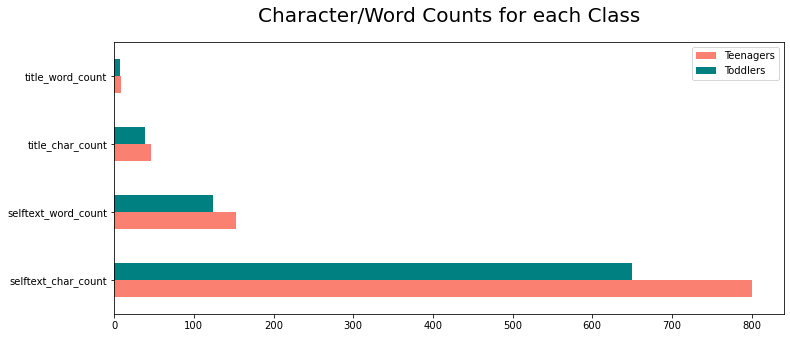

In [2225]:
a = df.groupby('class_target')[['title_char_count', 'title_word_count', 'selftext_char_count', 'selftext_word_count']].mean().T.sort_values(0, ascending=False).head(10).plot(kind='barh', figsize=(12,5), color=['salmon', 'teal'])
a.set_title('Character/Word Counts for each Class', fontsize=20, pad=20)
a.legend(['Teenagers', 'Toddlers']);
plt.savefig('../images/fig8.jpg', dpi=400)

### Top 20 Most Used Words in Teenager Posts (class 0).

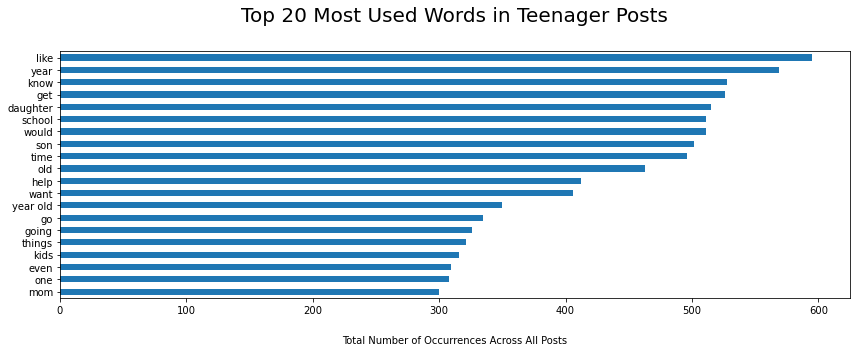

In [2226]:
plt.figure(figsize=(12,5))
fontdict = {'fontsize': 20, 'color' : 'black'}
plt.title('Top 20 Most Used Words in Teenager Posts', fontdict=fontdict, pad=30)
plt.xlabel('Total Number of Occurrences Across All Posts', fontsize=10, labelpad=20)
term_df[term_df['class_target'] == 0.0].sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh');
plt.tight_layout()
plt.savefig('../images/fig9.jpg', dpi=400)

### Top 20 Most Used Words in Toddler Posts (class 1).

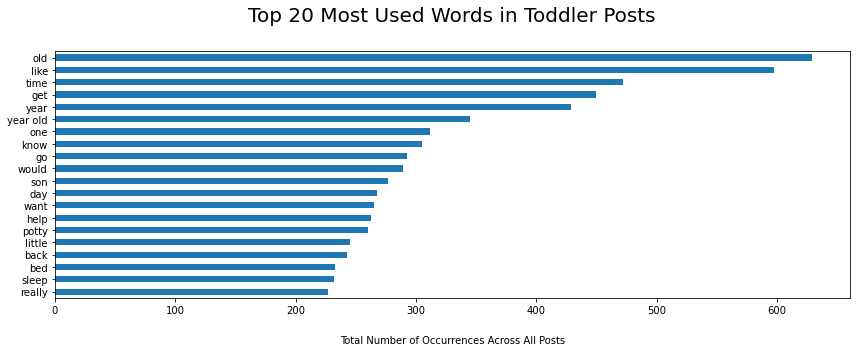

In [2227]:
plt.figure(figsize=(12,5))
fontdict = {'fontsize': 20, 'color' : 'black'}
plt.title('Top 20 Most Used Words in Toddler Posts', fontdict=fontdict, pad=30)
plt.xlabel('Total Number of Occurrences Across All Posts', fontsize=10, labelpad=20)
term_df[term_df['class_target'] == 1.0].sum().sort_values(ascending=False).drop('class_target').head(20).sort_values(ascending=True).plot(kind='barh');
plt.tight_layout()
plt.savefig('../images/fig10.jpg', dpi=400)

In [2228]:
#term_df.groupby('class_target').mean().T.sort_values(0, ascending=False).head(10)

In [2229]:
#term_df.groupby('class_target').mean().T.sort_values(1, ascending=False).head(10)

### Top 10 Most Used Words in Teenager Posts compared to their usage in Toddler Posts.
*The words "daughter", "son", and "school" are used significantly more ofthen in teenager posts than in toddler posts.*

<Figure size 864x360 with 0 Axes>

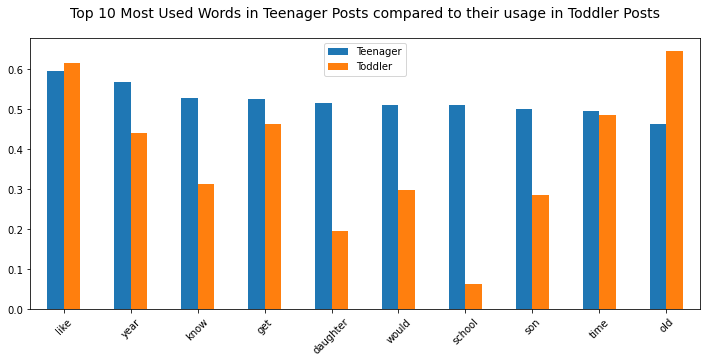

In [2230]:
plt.figure(figsize=(12,5))
term_df.groupby('class_target').mean().T.sort_values(0, ascending=False).head(10).plot(kind='bar', figsize=(12,5))
plt.title('Top 10 Most Used Words in Teenager Posts compared to their usage in Toddler Posts', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.legend(['Teenager', 'Toddler']);
plt.savefig('../images/fig11.jpg', dpi=400)

### Top 10 Most Used Words in Toddler Posts compared to their usage in Teenager Posts.

<Figure size 864x360 with 0 Axes>

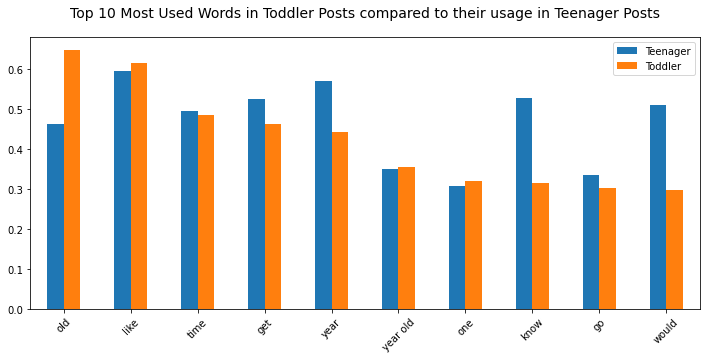

In [2231]:
plt.figure(figsize=(12,5))
term_df.groupby('class_target').mean().T.sort_values(1, ascending=False).head(10).plot(kind='bar', figsize=(12,5));
plt.title('Top 10 Most Used Words in Toddler Posts compared to their usage in Teenager Posts', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.legend(['Teenager', 'Toddler']);
plt.savefig('../images/fig12.jpg', dpi=400)

### Top 10 words with significantly higher occurrences in Toddler posts than in Teenager Posts.
*These words indicate trending topics specific to the Toddler subreddit.*

In [2232]:
temp = term_df.groupby('class_target').mean().T.sort_values(1, ascending=False)

<Figure size 864x360 with 0 Axes>

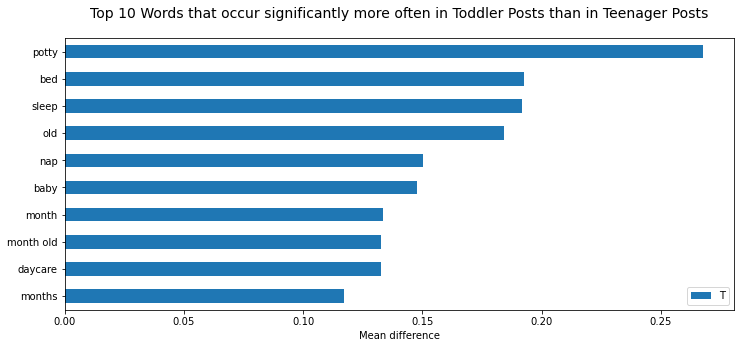

In [2233]:
plt.figure(figsize=(12,5))
pd.DataFrame(temp[1].values - temp[0].values, index=temp.index, columns=['dif']).sort_values(by='dif', ascending=False).head(10).sort_values(by='dif', ascending=True).plot(kind='barh', figsize=(12,5))
plt.title('Top 10 Words that occur significantly more often in Toddler Posts than in Teenager Posts', fontsize=14, pad=20)
plt.xlabel('Mean difference')
plt.legend('Toddler');
plt.savefig('../images/fig13.jpg', dpi=400)

### Top 10 words with significantly higher occurrences in Teenager posts than in Toddler Posts.
*These words indicate trending topics in the Parenting subreddit (with flair 'Teenager 13-19 Years').*

In [2234]:
temp = term_df.groupby('class_target').mean().T.sort_values(0, ascending=False)

<Figure size 864x360 with 0 Axes>

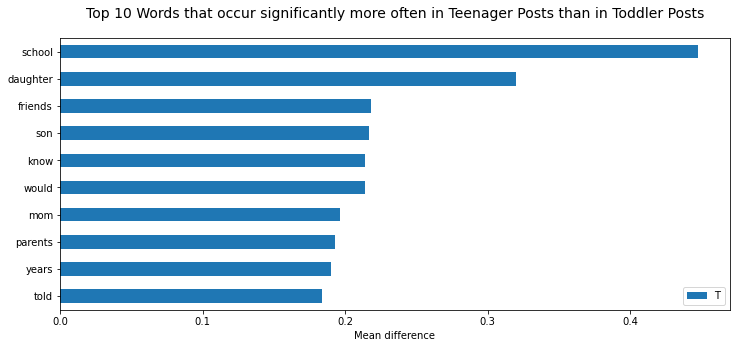

In [2235]:
plt.figure(figsize=(12,5));
pd.DataFrame(temp[0].values - temp[1].values, index=temp.index, columns=['dif']).sort_values(by='dif', ascending=False).head(10).sort_values(by='dif',ascending=True).plot(kind='barh', figsize=(12,5));
plt.title('Top 10 Words that occur significantly more often in Teenager Posts than in Toddler Posts', fontsize=14, pad=20)
plt.xlabel('Mean difference')
plt.legend('Teenager');
plt.savefig('../images/fig14.jpg', dpi=400)

### Top 20 words that overlap across both categories of posts.

In [2236]:
top_words_teenagers = list(term_df.groupby('class_target').
     mean().T.sort_values(0, ascending=False).head(20).index)

top_words_toddlers = list(term_df.groupby('class_target').
     mean().T.sort_values(1, ascending=False).head(20).index)

In [2237]:
top_words_overlap = [word for word in top_words_teenagers if word in top_words_toddlers]

In [2238]:
top_words_overlap

['like',
 'year',
 'know',
 'get',
 'would',
 'son',
 'time',
 'old',
 'help',
 'want',
 'year old',
 'go',
 'even',
 'one']

### Create a column 'text_tokens' containing the tokens of the 'text' variable.

In [2239]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question


In [2240]:
tokenizer = RegexpTokenizer('\s+', gaps=True)

In [2241]:
df['text_tokens'] = df['text'].map(lambda x: re.sub('\d+ ', '', x.lower()))

In [2242]:
df['text_tokens'] = df['text_tokens'].map(lambda x: tokenizer.tokenize(x))

In [2243]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair,text_tokens
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question,"[my, 2yo, doesn’t, like, the, potty., hey!, i’..."


### Create a column 'text_lemmas' with the lemmas of the 'text' variable.

In [2244]:
lemmatizer = WordNetLemmatizer()

In [2245]:
df['text_lemmas'] = [pd.Series(token).map(lambda x: lemmatizer.lemmatize(x)) for token in df['text_tokens']]

In [2246]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair,text_tokens,text_lemmas
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question,"[my, 2yo, doesn’t, like, the, potty., hey!, i’...",0 my 1 2yo 2 ...


### Sentiment analysis.

In [2247]:
sentiment = SentimentIntensityAnalyzer()

In [2248]:
df['sent'] = [sentiment.polarity_scores(text) for text in df['text']]

In [2249]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair,text_tokens,text_lemmas,sent
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question,"[my, 2yo, doesn’t, like, the, potty., hey!, i’...",0 my 1 2yo 2 ...,"{'neg': 0.05, 'neu': 0.807, 'pos': 0.142, 'com..."


In [2250]:
df['neg'] = [item['neg'] for item in df['sent']]

In [2251]:
df['neu'] = [item['neu'] for item in df['sent']]

In [2252]:
df['pos'] = [item['pos'] for item in df['sent']]

In [2253]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair,text_tokens,text_lemmas,sent,neg,neu,pos
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question,"[my, 2yo, doesn’t, like, the, potty., hey!, i’...",0 my 1 2yo 2 ...,"{'neg': 0.05, 'neu': 0.807, 'pos': 0.142, 'com...",0.05,0.807,0.142


### There is no significant difference in sentiment between the two categories.
*Overall, the posts are neutral in both classes.*  
*There are slightly more positive posts than negative.*

<Figure size 864x360 with 0 Axes>

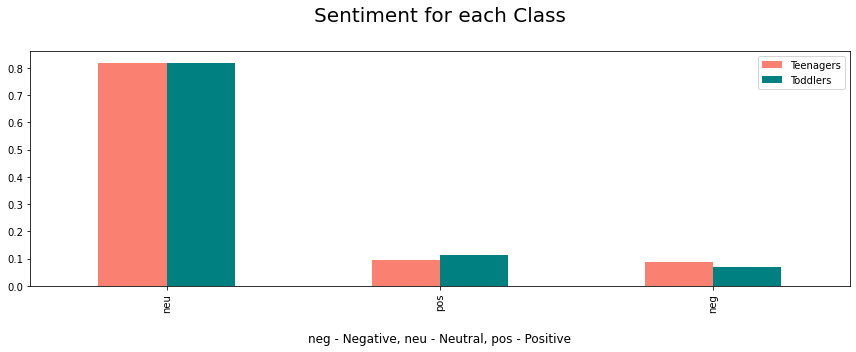

In [2254]:
plt.figure(figsize=(12,5))
a = df.groupby('class_target')[['neg', 'neu', 'pos']].mean().T.sort_values(0, ascending=False).head(10).plot(kind='bar', figsize=(12,5), color=['salmon', 'teal'])
plt.title('Sentiment for each Class', fontsize=20, pad=30)
plt.xlabel('neg - Negative, neu - Neutral, pos - Positive', fontsize=12, labelpad=20)
plt.legend(['Teenagers', 'Toddlers']);
plt.tight_layout()
plt.savefig('../images/fig15.jpg', dpi=400)

### Topic Analysis.

In [2255]:
df['blob'] =  df['text'].map(lambda x: ','.join(TextBlob(x).noun_phrases))

In [2256]:
df.head(1)

,title,selftext,class_target,text,title_char_count,title_word_count,selftext_char_count,selftext_word_count,flair,text_tokens,text_lemmas,sent,neg,neu,pos,blob
0,My 2yo doesn’t like the potty.,Hey!\n\nI’ve been trying to potty train my dau...,1,My 2yo doesn’t like the potty. Hey! I’ve been...,30,6,628,121,Question,"[my, 2yo, doesn’t, like, the, potty., hey!, i’...",0 my 1 2yo 2 ...,"{'neg': 0.05, 'neu': 0.807, 'pos': 0.142, 'com...",0.05,0.807,0.142,"2yo doesn ’ t,hey,’ ve,potty train,’ ve,schedu..."


In [2257]:
cvec = CountVectorizer(analyzer='word', token_pattern=',\w+\s\w+,')

In [2258]:
cvec.fit(df['blob'])

CountVectorizer(token_pattern=',\\w+\\s\\w+,')

In [2259]:
term_mat = cvec.transform(df['blob'])

In [2260]:
term_df = pd.DataFrame(term_mat.todense(), columns=cvec.get_feature_names())

In [2261]:
term_df.shape

(1972, 3908)

In [2262]:
term_df.insert(0, 'class_target', df['class_target'])

In [2263]:
term_df.head(1)

,class_target,",10min drive,",",14yo daughter,",",14yo niece,",",14yo sister,",",15yo daughter,",",16f grades,",",16yo daughter,",",17yo daughter,",",1st anniversary,",",1st birthday,",",1st world,",",1st yr,",",20f girlfriend,",",22yo guy,",",24mo boy,",",25mo girl,",",25yo man,",",2a bc,",",2hr nap,",",2t clothes,",",2yo boy,",",2yo daughter,",",2yo molars,",",33weeks pregnant,",",3k lottery,",",3yo daughter,",",3yo sister,",",3yo son,",",3yo toddler,",",45min commute,",",4yo birthday,",",4yo boy,",",4yo daughter,",",5m pregnant,",",5th day,",",5th grade,",",5th percentile,",",7th grade,",",90s tunes,",",99th percentile,",",above phrases,",",abs muscles,",",absolute champ,",",absolute chaos,",",absolute joy,",",abusive etc,",",abusive family,",",abusive marriage,",",abusive men,",",abusive mother,",",abusive narcissist,",",abusive situations,",",ac cross,",",academic excellence,",",academic prowess,",",act grumpy,",",action figures,",",activate parental,",",acts stupid,",",acts way,",",actual addiction,",",actual books,",",actual cost,",",actual food,",",actual fuck,",",actual house,",",actual issue,",",actual job,",",actual parent,",",actual picture,",",actual school,",",actual story,",",actual tea,",",actual words,",",addict talk,",",addiction issues,",",additional actions,",",additional details,",",additional info,",",additional interventions,",",additional perspective,",",additional questions,",",additional work,",",adolescent sons,",",adolescents kid,",",adoption agency,",",adorable request,",",adrenaline shots,",",adult apps,",",adult authority,",",adult laughs,",",adult stuff,",",adult time,",",adult tournaments,",",adults advice,",",adults alway,",",adventurous 3yo,",",advice groups,",",advice guys,",",advice i,",",advice pls,",",aerospace engineering,",",affectionate girl,",",afraid i,",",afraid people,",",afternoon storytime,",",age bracket,",",age friends,",",age gap,",",age group,",",age i,",",age people,",",age range,",",age requirement,",",aggressive behavior,",",aggressive hug,",",aggressive tone,",",air purifier,",",aka whenever,",",alarm clock,",",all day,",",allergy season,",",ally friends,",",alright look,",",alternate authority,",",alternative help,",",alternative route,",",alternative strategy,",",amazing article,",",amazing average,",",amazing characteristics,",",amazing fellow,",",amazing girl,",",amazing person,",",amazing teen,",",amazing teenagers,",",amazing tools,",",amicable arrangement,",",amongst teens,",",and at,",",and then,",",andrew yang,",",androgynous name,",",anger issues,",",angry kind,",",angry stage,",",angry tantrum,",",animal crossing,",",animal shelter,",",anime conventions,",",anorexia nervosa,",",antsy till,",",anxiety attack,",",anxiety disorders,",",anxiety issue,",",anxiety issues,",",anxiety levels,",",anxious child,",",anxious human,",",anxious parent,",",apartment building,",",apology sweets,",",app mode,",",app shows,",",app store,",",app tracks,",",apple crumble,",",apple etc,",",apple juice,",",apple orchard,",",apple sauce,",",applicator part,",",appropriate locations,",",appropriate treatment,",",appropriate ways,",",approx hours,",",approx minutes,",",argument skills,",",arm hurts,",",arm joints,",",arm pains,",",arm pits,",",arrogant assumption,",",arse home,",",articulate toddler,",",arts class,",",asian dad,",",asleep quicker,",",ass ordeal,",",assault rifles,",",assessment tools,",",asshole calls,",",associates degree,",",at all,",",at college,",",athletic scholarship,",",attention thing,",",autism diagnosis,",",autism evaluations,",",autism spectrum,",",autistic teen,",",average person,",",average teen,",",awesome parents,",",awful feeling,",",awful message,",",awful names,",",awful stretches,",",awkward silence,",",ba k,",",babies butt,",",babies mouth,",",baby boy,",",baby brother,",",baby classes,",",baby crying,",",baby days,",",baby dolls,",",baby equipment,",",baby gate,",",baby gates,",",baby gatherings,",",baby girl,",",baby leaves,",",baby monitor,",",ba

### Top 25 topics discussed in the Toddler posts.

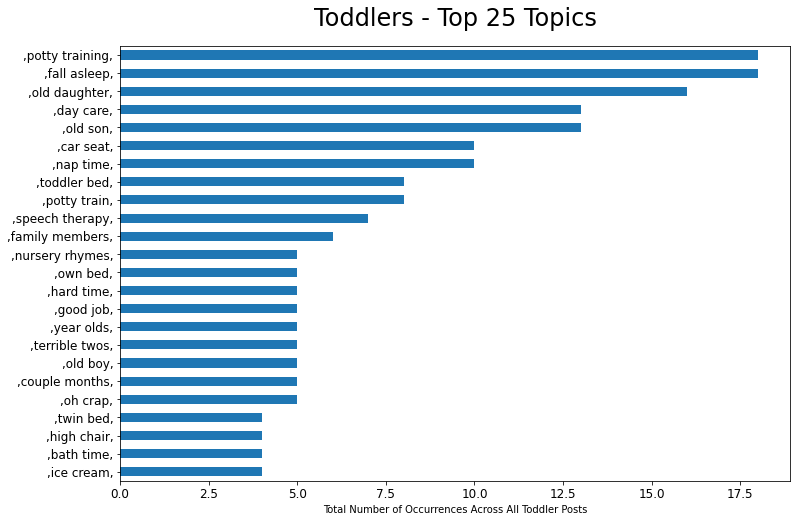

In [2264]:
plt.figure(figsize=(12,8))
fontdict = {'fontsize': 24, 'color' : 'black'}
plt.title('Toddlers - Top 25 Topics', fontdict=fontdict, pad=20)
plt.xlabel('Total Number of Occurrences Across All Toddler Posts', fontsize=10)
plot = term_df[term_df['class_target']==1].sum().sort_values(ascending=False).head(25).drop('class_target').sort_values(ascending=True).plot(kind='barh', fontsize=12)
plt.savefig('../images/fig16.jpg', dpi=400)

### Top 25 topics discussed in the Teenager posts.

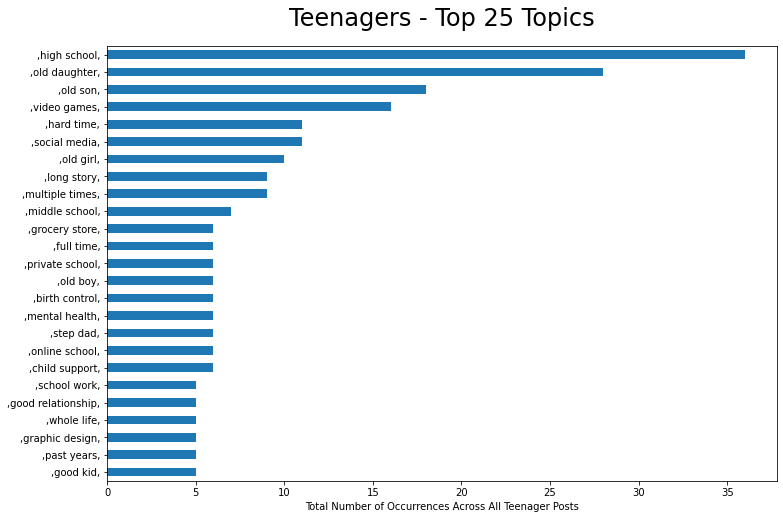

In [2265]:
plt.figure(figsize=(12,8))
fontdict = {'fontsize': 24, 'color' : 'black'}
plt.title('Teenagers - Top 25 Topics', fontdict=fontdict, pad=20)
plt.xlabel('Total Number of Occurrences Across All Teenager Posts', fontsize=10)
term_df[term_df['class_target']==0].sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh')
plt.savefig('../images/fig17.jpg', dpi=400)